# Importing necessary libraries

In [2]:
''' Author : Prasannajit Hota '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading CSV file

In [3]:
df= pd.read_csv("SuperStoreDataset.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Checking the shape of the dataset
df.shape

(9994, 13)

In [5]:
# All COlumns 
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#null value cheaking
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Deleting the duplicate values
df=df.drop_duplicates()
df.shape

(9977, 13)

In [9]:
# Deleting the "Postal" Column
df=df.drop(["Postal Code"],axis=1)
df.shape

(9977, 12)

###  unique elements

In [10]:
# Category Column
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [11]:
# State Column
print(df['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [12]:
# Total no. of unique states
no_of_states= df['State'].nunique()
no_of_states

49

In [13]:
# Sub-Category Column
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [14]:
# Total no. of Sub-Category
no_of_SubCategory=df['Sub-Category'].nunique()
no_of_SubCategory

17

In [15]:
# Segment Column
print(df['Segment'].unique())

['Consumer' 'Corporate' 'Home Office']


In [16]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [17]:
# Statistical description of the column
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [18]:
# dataset of those who are facing loss
loss_df=df[df.Profit<0]
loss_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [19]:
# Checking the shape
loss_df.shape

(1869, 12)

In [20]:
# Loss Dataset statistical description
loss_df.describe()

,Sales,Quantity,Discount,Profit
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,250.627190,3.764045,0.480813,-83.527549
std,715.426811,2.142032,0.235053,284.565230
min,0.444000,1.000000,0.100000,-6599.978000
25%,12.544000,2.000000,0.200000,-58.687200
50%,71.088000,3.000000,0.400000,-18.106800
75%,285.480000,5.000000,0.700000,-6.286000
max,22638.480000,14.000000,0.800000,-0.089500


In [21]:
# Suming up the total loss
total_loss = np.negative(loss_df["Profit"].sum())
print("total_loss= %.2f" %total_loss)

total_loss= 156112.99


Discount results in loss.

In [22]:
#loss is grouped by sub catagory
loss_df.groupby(by='Sub-Category').sum()

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,10958.8000,330,18.20,-930.6265
Appliances,3382.5340,235,53.60,-8629.6412
Binders,36137.0490,2453,451.60,-38504.2594
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91707.0840,874,61.10,-9868.7825
Fasteners,149.2800,55,2.40,-33.1952
Furnishings,12845.8440,597,88.60,-6490.9134
Machines,72456.2530,157,25.60,-30118.6682
Phones,35797.8400,476,46.60,-7530.6235




** binders sales is high so no discount is required

** So better to give discounts on which are getting less sold so that even they will start getting sold more.



In [23]:
loss_df['Sub-Category'].value_counts()

Binders        612
Chairs         234
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [24]:
#loss acording to city
loss_df.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411
Houston,37640.7304,683,104.14,-14785.3668
Chicago,19906.4480,538,87.40,-11114.3901
San Antonio,17395.1450,139,17.10,-7831.0254
Lancaster,7699.2420,71,9.40,-7632.4946
Burlington,12044.8740,19,2.00,-5999.3318
Dallas,9994.0562,280,39.30,-4208.5218
Jacksonville,31146.2710,154,18.85,-4059.9857
New York City,19533.8020,132,12.20,-3966.0226


In [25]:
# mean of losses
loss_df.sort_values(['Sales'],ascending=True).groupby(by='Category').mean()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,361.296234,3.716690,0.367237,-85.447476
Office Supplies,103.508600,3.866667,0.617401,-63.964996
Technology,439.899974,3.553506,0.333579,-142.361322


Technology catagory leads to more loss

In [26]:
# 10 least selling states
df.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

These are the last 10 states where sales are very less.

In [27]:
#calculating the sum of numbers
df.sort_values(['Segment'], ascending=True).groupby("Segment").sum()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.160833e+06,19497,820.51,134007.4413
Corporate,7.060701e+05,11591,476.85,91954.9798
Home Office,4.292927e+05,6732,261.83,60279.0015


Consumer sales are making most of the profits. but sale is less so marketing can help to boost sales

In [28]:
# Sorting the Region  in ascending order and grouping by Region 
df.sort_values(['Region'], ascending=True).groupby("Region").sum()

,Sales,Quantity,Discount,Profit
Region,,,,
Central,500782.8528,8768,557.14,39655.8752
East,678435.1960,10609,413.50,91506.3092
South,391721.9050,6209,238.55,46749.4303
West,725255.6365,12234,350.00,108329.8079


We have to focus on south region .and boost its sales for more profits

# superstore analysis visualization

### Bargraph 

Text(0, 0.5, 'Sales')

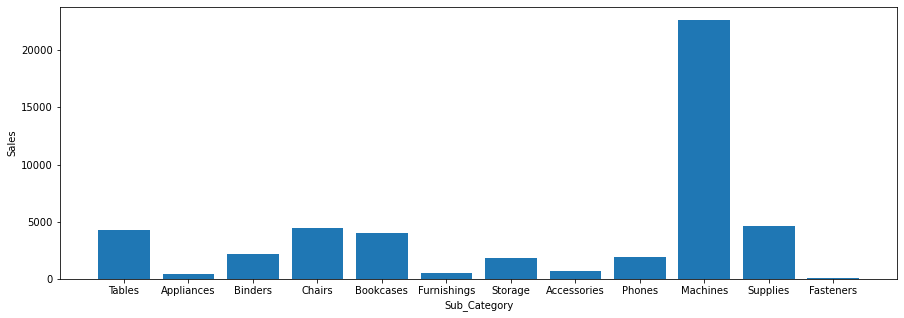

In [29]:

plt.rcParams["figure.figsize"]=(15,5)
plt.bar(loss_df['Sub-Category'],loss_df['Sales'])
plt.rcParams.update({"font.size":10})
plt.xlabel('Sub_Category')
plt.ylabel('Sales')

sales of appliences and Accessories is very low.

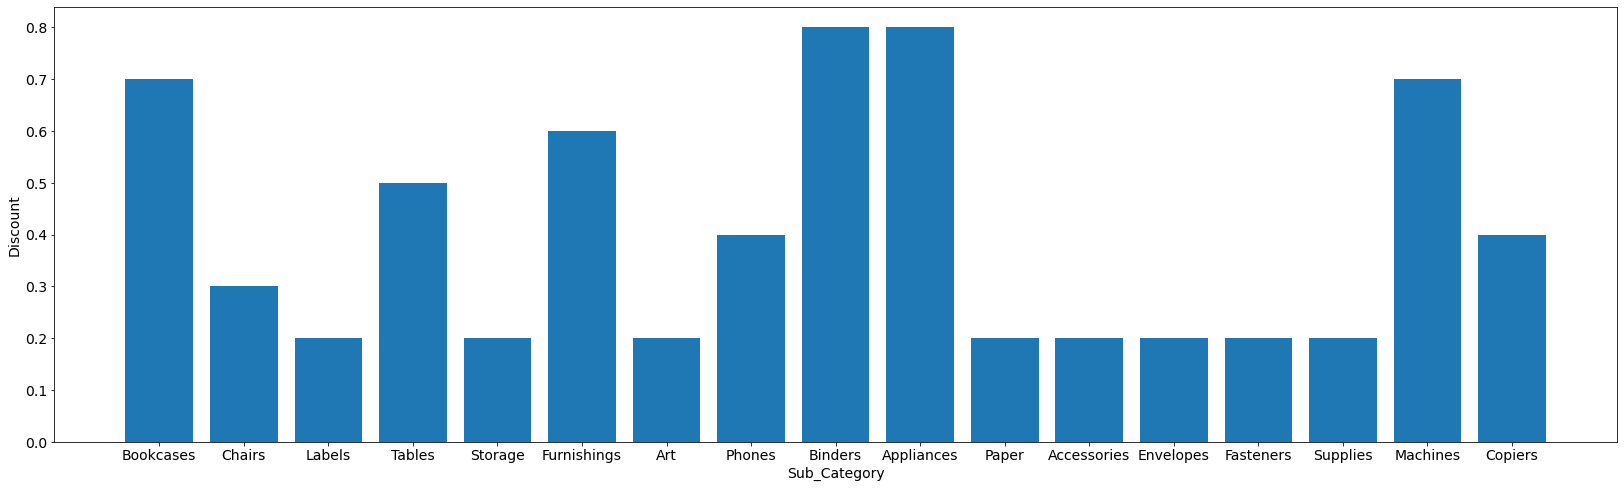

In [44]:

plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Discount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Discount');

Too much discount in binders.discounts needs to be lowered

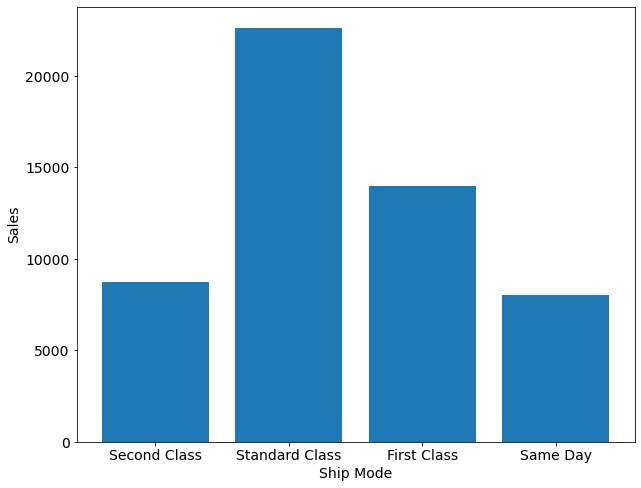

In [32]:

plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['Ship Mode'],df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

### Barplot
sales in standard class in ship mode is high.

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

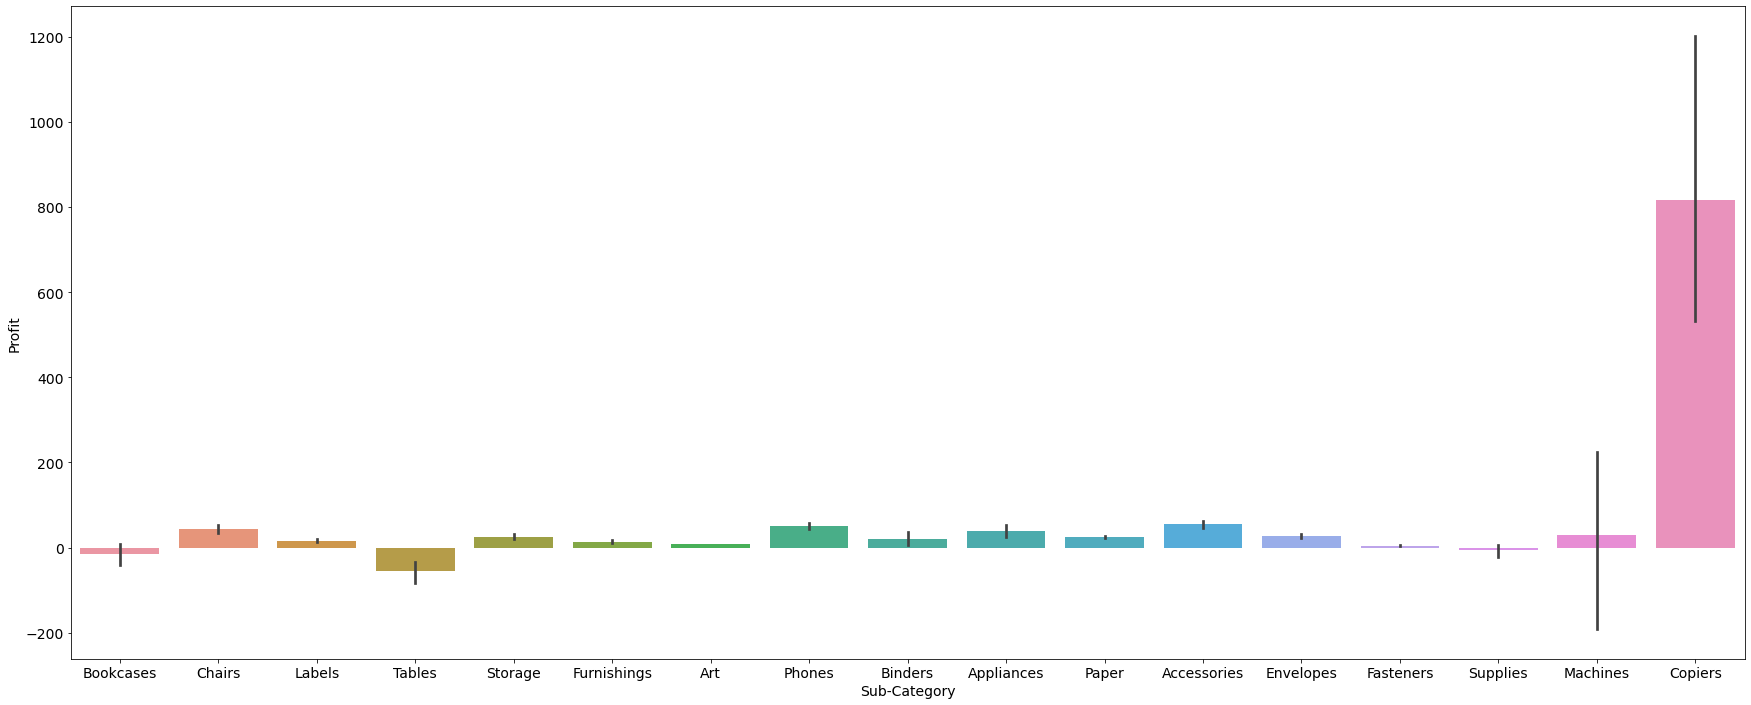

In [35]:

plt.figure(figsize=(30,12))
sns.barplot(x=df["Sub-Category"], y=df["Profit"])

profit in copiers is high and loss in tables is highest. so we need to improve the product catgory

### Countplot

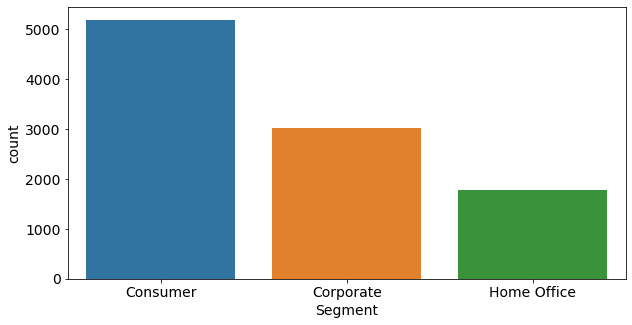

In [105]:

plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=df.Segment)
plt.show();

In the Home Office Segment improvement is needed.

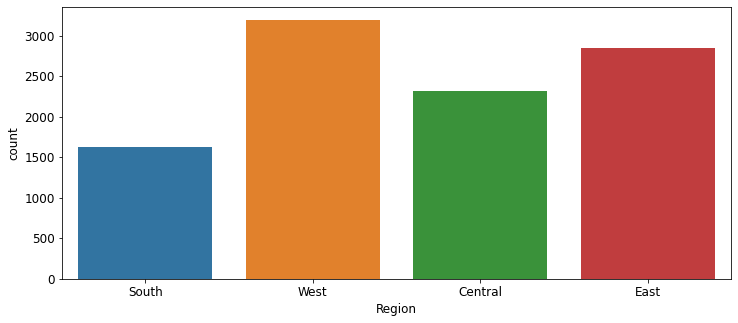

In [109]:
# Region Column
plt.rcParams['figure.figsize']=(12,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=df)
plt.show()

South region has least sales and need improvement.

C:\Users\myasu\AppData\Local\Temp\ipykernel_10100\844973110.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Sub-Category")["Profit","Sales"].agg(["sum"]).plot.bar()


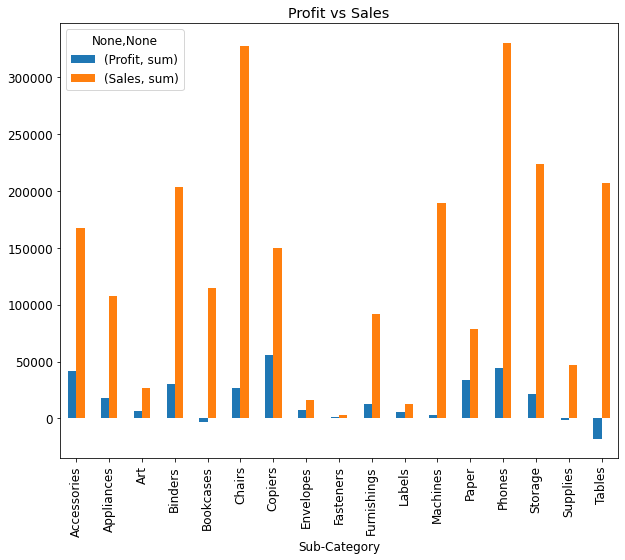

In [112]:
# provit,sales vs sub_catgory
df.groupby("Sub-Category")["Profit","Sales"].agg(["sum"]).plot.bar()
plt.title("Profit vs Sales")
plt.rcParams["figure.figsize"]=[10,8]
plt.show()

copier is the most profitable.phones and chairs sale is too high

tables are in loss

C:\Users\myasu\AppData\Local\Temp\ipykernel_10100\1865249277.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Region")["Profit","Sales"].agg(["sum"]).plot.bar()


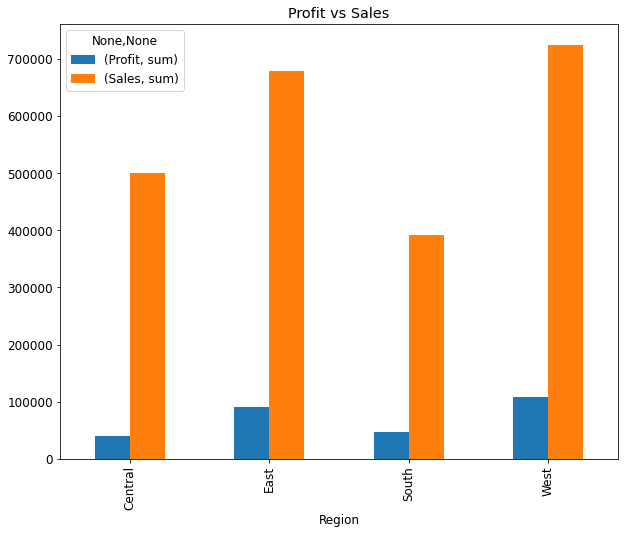

In [113]:
# profit,sales vs region
df.groupby("Region")["Profit","Sales"].agg(["sum"]).plot.bar()
plt.title("Profit vs Sales")
plt.rcParams["figure.figsize"]=[10,8]
plt.show()

sales in east and west is high. 
profit in south is goos compared to sales but needs improvement in sales

### Lineplot

C:\Users\myasu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

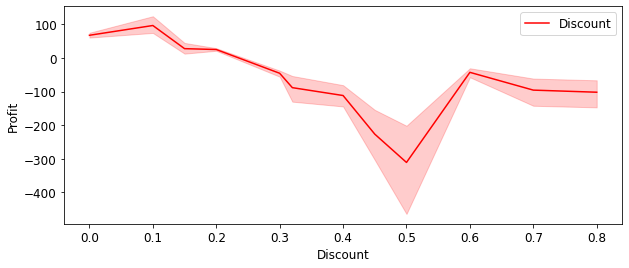

In [115]:

plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit',data=df, color="r",label="Discount")

High disconts resuls in low profits.

In [116]:
# Correlation
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


##  Heatmap Analysis
increse in sales resuts in increse in profits
increse in dicounts results in decrese in profits

## Statistical Summary 

In [118]:
df.groupby("State").Profit.agg(["sum","min","max","mean","median","std","var","count"])

,sum,min,max,mean,median,std,var,count
State,,,,,,,,
Alabama,5786.8253,0.0000,1459.2000,94.865989,16.87500,210.901876,44479.601429,61
Arizona,-3427.9246,-814.4832,211.4955,-15.303235,2.53365,109.266267,11939.117124,224
Arkansas,4008.6871,1.4190,843.1706,66.811452,18.34080,123.249880,15190.532873,60
California,76330.7891,-325.5720,1906.4850,38.241878,13.33380,97.803399,9565.504848,1996
Colorado,-6527.8579,-3399.9800,247.9960,-35.867351,3.12480,276.424024,76410.240842,182
Connecticut,3511.4918,-15.5826,294.6710,42.823071,12.18310,66.138081,4374.245726,82
Delaware,9977.3748,-48.7839,5039.9856,103.930988,19.19700,518.953513,269312.749126,96
District of Columbia,1059.5893,4.4344,648.5624,105.958930,14.52720,213.461353,45565.749398,10
Florida,-3399.3017,-1811.0784,327.5922,-8.875461,2.93400,126.324165,15957.794770,383


### Pairplot

### Boxplot

C:\Users\myasu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

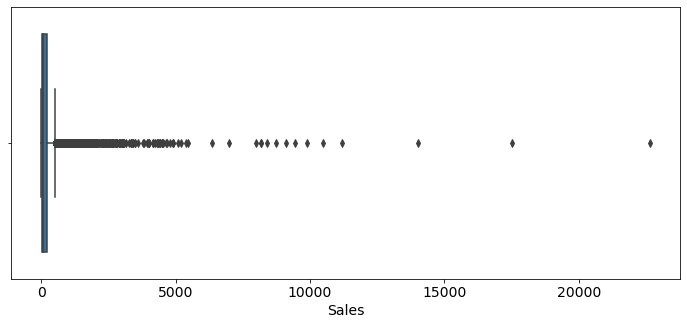

In [39]:
# Sales 
fig,axes=plt.subplots(figsize=(12,5))
sns.boxplot(df["Sales"])

C:\Users\myasu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

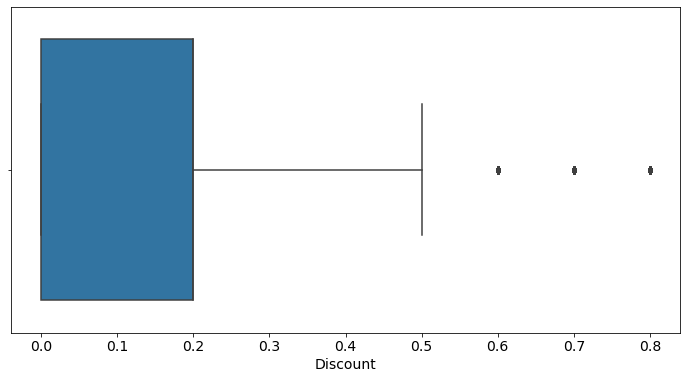

In [40]:
# Discount 
fig,axes=plt.subplots(figsize=(12,6))
sns.boxplot(df["Discount"])

C:\Users\myasu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

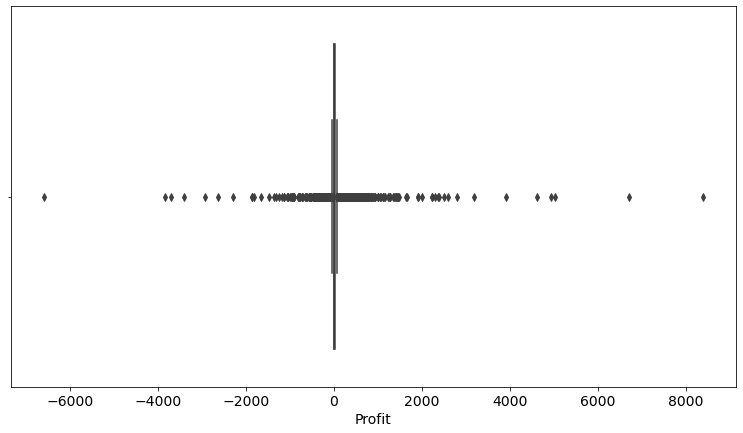

In [41]:
# Profit Column
fig,axes=plt.subplots(figsize=(13,7))
sns.boxplot(df["Profit"])

## conclusion
Sales in Consumer segment is high but low in home office segment. Home office segment needs improvement in products which will boost sales.
Copiers is the most profitable product. If copier sales will increase profit will also increase.
West region has highest sales and profit .south region has more profit margin but has less sales. Sales could increase if more discount is given.
Discount and profit is negatively related to each other .Discounts should only be given for limited period of time.
Most of the product sold is under 10k .Highest profit is 8k and loss is 4k
Marketing and discounts can boost sales in underperforming regions.
